##    Zipline <br> <font size='4'> <br/> "Exploratory Data Analysis & Visualization"</font> <br> <font size='2'> Reza Taeb - Data Analyst Intern Candidate <br>   

Zipline is the world's only drone delivery system at national scale to send urgent medicines like blood transfusions and vaccines to those in need, currently operating in Rwanda.  

Zipline utilizes the fully autonomous drones, "Zip", which consists of three main parts - body, wing, battery - and are all made from scratch in the house. 

In this piece, I will try to extract some actionable insights from the dataset gathered at the Zipline distribution center in Muhanga, Rwanda.


In [1]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime
from scipy import stats
import math

In [2]:
## loading dataset and getting familiar with it

summary_data = pd.read_csv("data_scientist_take-home/summary_data.csv")

# adjust output view

pd.set_option('display.width', 90)
sns.set()

# Getting familiar with summary dataset 

print (summary_data.info())
print (summary_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 14 columns):
flight_id                447 non-null int64
air_temperature          447 non-null float64
battery_serial_number    447 non-null object
body_serial_number       447 non-null int64
commit                   447 non-null object
launch_airspeed          447 non-null float64
launch_groundspeed       447 non-null float64
launch_timestamp         447 non-null object
preflight_voltage        431 non-null float64
rel_humidity             447 non-null float64
static_pressure          447 non-null float64
wind_direction           447 non-null float64
wind_magnitude           447 non-null float64
wing_serial_number       447 non-null object
dtypes: float64(8), int64(2), object(4)
memory usage: 49.0+ KB
None
   flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
0      16951        20.550000       15SPJJJ09036021  577350132807348254  5c504d9a16   
1      16952     

The "Summary_data" dataset has ** 447 ** entries each specified with unique 'flight_id' - ranging **from 16951 to 17745 ** . <br>
The only column with NaN values is ** preflight_voltage ** (16 NaN entires). 

In [3]:
## Basic Manipulation 

# convert the 'body_serial_number' type from int to string class in dataset
summary_data['body_serial_number'] = summary_data['body_serial_number'].apply(str)

# Change the 'launch_timestamp' type from str to datetime in dataset 
summary_data['launch_timestamp'] = pd.to_datetime(summary_data['launch_timestamp'])

**Ground speed** , **air speed** and **wind** have relationship based on the below formula (2-dimension enviroment):

** Airspeed = GroundSpeed - Wind Magnitude * Cos(teta) ** <br>
teta = Relational degree between wind and groundspeed

So, I added a column as **Wind Effect** to integrate magnitude and direction of wind together.

In [4]:
# Adding one column as "Wind Effect" (applying 'wind magnitude' and 'wind direction' in direction of launches)

summary_data['launch_wind_effect'] = np.nan
summary_data['launch_wind_effect'] = ((-1) * summary_data['wind_magnitude'])*(np.cos(np.radians(summary_data['wind_direction'])))


In [5]:
## Basic Statistics 

print (summary_data.describe())

          flight_id  air_temperature  launch_airspeed  launch_groundspeed  \
count    447.000000       447.000000       447.000000          447.000000   
mean   17373.454139        25.234679        31.976493           30.112178   
std      232.833168         4.079718         1.759982            0.371296   
min    16951.000000        16.500000        28.027149           27.548899   
25%    17170.000000        22.037499        30.761058           29.926867   
50%    17359.000000        24.950000        31.893215           30.097641   
75%    17590.500000        28.325000        33.198513           30.282600   
max    17745.000000        34.600000        36.929199           31.205293   

       preflight_voltage  rel_humidity  static_pressure  wind_direction  wind_magnitude  \
count         431.000000    447.000000       447.000000      447.000000      447.000000   
mean           32.145665     56.291622     80456.449107      -45.294524        2.359469   
std             0.187159      7.2

### Data exploration of flight elements, bodies, batteris, wings, and software

In [6]:
# Checking unique "flight" , "battery", "body", "wing", and "software version". 

print ('In this dataset: \n')

print ('There are' + '\033[1m' + ' %d ' %summary_data['flight_id'].nunique() + '\033[0m' + 'unique flights.' )
print ('There are' + '\033[1m' + ' %d ' %summary_data['battery_serial_number'].nunique() + '\033[0m' + 'unique batteries.')
print ('There are' + '\033[1m' + ' %d ' %summary_data['body_serial_number'].nunique()+ '\033[0m' + 'unique bodies.')
print ('There are' + '\033[1m' + ' %d ' %summary_data['wing_serial_number'].nunique() + '\033[0m' + 'unique wings.')
print ('There are' + '\033[1m' + ' %d ' %summary_data['commit'].nunique() + '\033[0m' + 'unique versions of program.')
print ('The duration of this data set is' + '\033[1m' + ' one month' + '\033[0m' + ': from' ,summary_data['launch_timestamp'].iloc[0], 'to',summary_data['launch_timestamp'].iloc[-1],'.')

In this dataset: 

There are 447 unique flights.
There are 26 unique batteries.
There are 15 unique bodies.
There are 18 unique wings.
There are 4 unique versions of program.
The duration of this data set is one month: from 2018-09-06 07:43:59 to 2018-10-05 17:43:08 .


### Checking possible correlation between attributes and their general distribution.

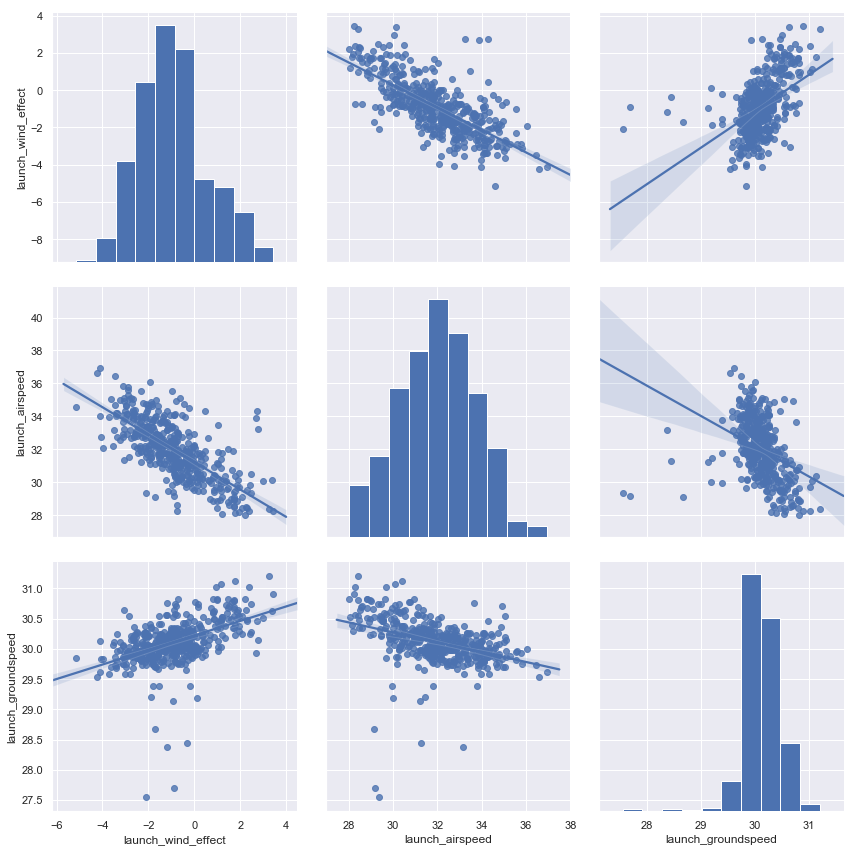

In [7]:
# 1- Ground Speed, Air Speed, and Wind Effect (Wind * Cos(theta))

sns.pairplot(summary_data, vars=['launch_wind_effect','launch_airspeed','launch_groundspeed'],height=4,kind="reg")
plt.show()

#### Some Points  

- Median of wind direction is about -51.6 degree, since the ** Negative Wind Effect **  can lower the essential magnitude of ground speed to create lift power, it would be good if launching rail get roatated in the direction of making more flights with close to -180 degree related to wind direction. 

- Launch air speed and Launch ground speed shows a very small negative correlation in general. Also, in most cases airspeed is higher than ground speed.  

- There are just few flights with launching ground speed less than ***29.54 ***. These points should be investigated more in depth. At the first glance these points do not show any unusal relationship with wind, and launch air speed. 

- Very extreme wind magnitude leads to extreme launch air speed. However there is just one point with extreme wind magnitude, so we can not generalize the theory.

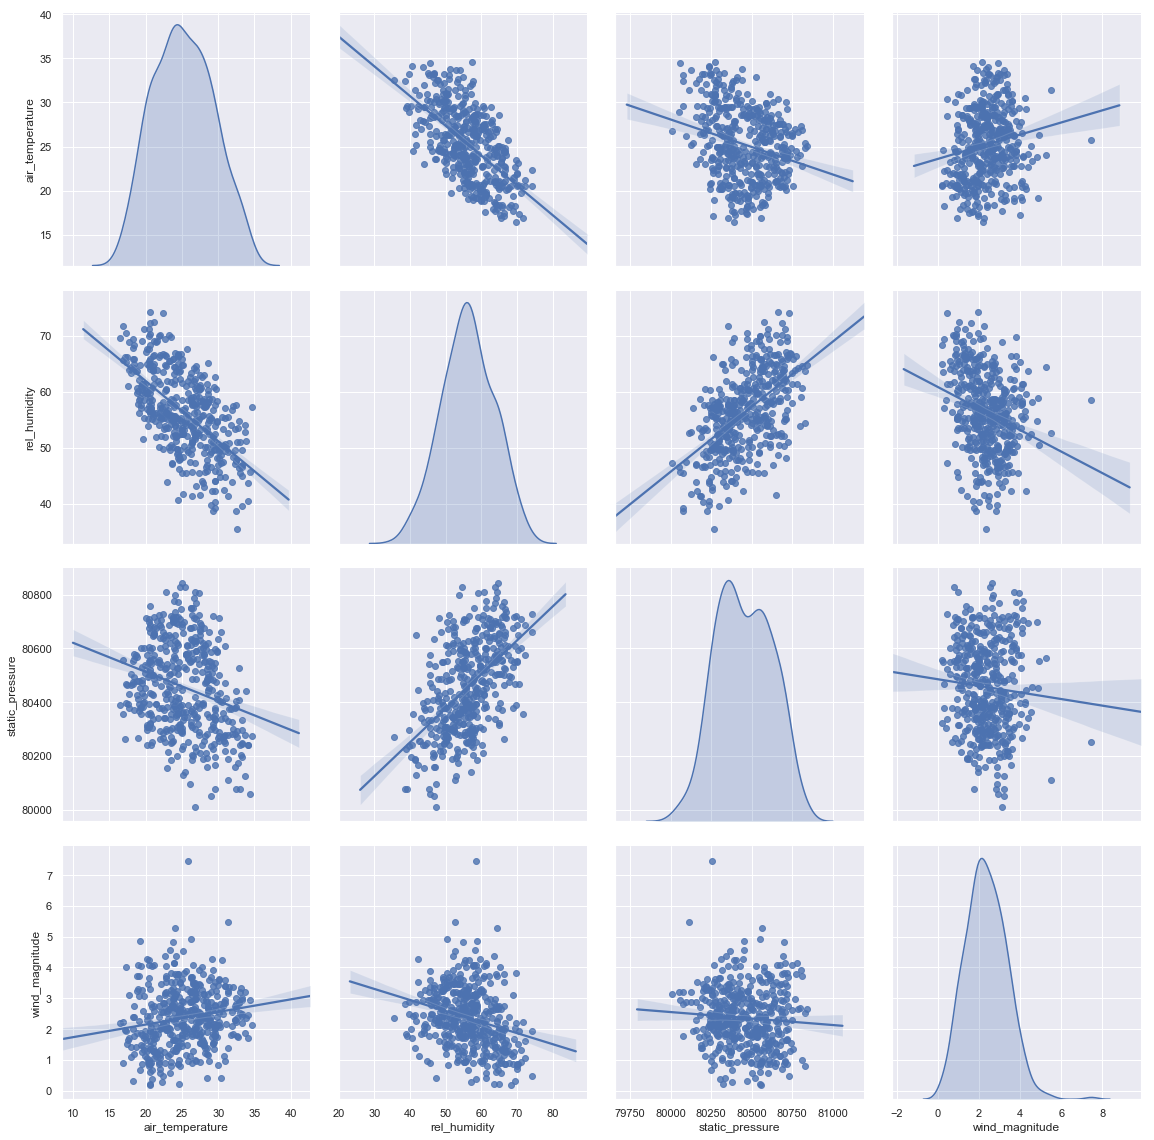

In [8]:
# 2- Checking possible correlation between some weather factors ("Air Temperature","Relative Humidity", "Static Pressure", "Wind Magnitude")

sns.pairplot(summary_data, vars=['air_temperature','rel_humidity','static_pressure','wind_magnitude'],height=4,kind="reg",diag_kind="kde")
plt.show()

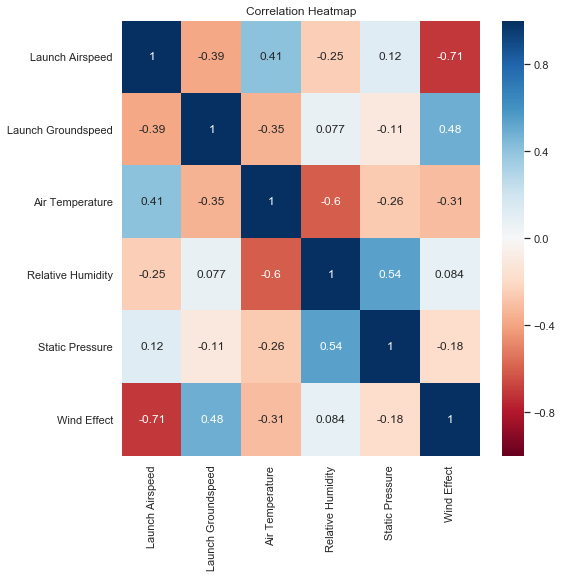

In [9]:
# 3- Correlation between columns (correlation heatmap)

corr_data = summary_data[['launch_airspeed','launch_groundspeed','air_temperature','rel_humidity','static_pressure','launch_wind_effect']]
corr = corr_data.corr()

# plot the heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['Launch Airspeed','Launch Groundspeed','Air Temperature','Relative Humidity','Static Pressure','Wind Effect'], yticklabels=['Launch Airspeed','Launch Groundspeed','Air Temperature','Relative Humidity','Static Pressure','Wind Effect'],vmin=1,vmax=-1)
plt.title("Correlation Heatmap")
plt.show()

**Launch Airspeed** and **Launch Groundspeed** are the important quantities in generating lift power of drone and its flight. These two quantities can be checked as indices to recognize patterns, possible anomalies and defective components.   

Airspeed is the vector difference between ground speed and wind speed.

We assume physical components were built similarly. Therefore, all drones should have approximately similar launches and start similar flights. 

Launching groundspeed should be explored in order to find some possible outliers. These outliers can be related to anomalies of some working components such as *** Launching rail, actuator motor, and ... *** 

So let's see if we see any anomaly in launching air speed and ground speed. Then I will move forward to find some possible reasons behind those anomalies in other attributes.

### Groundspeed Vs Airspeed

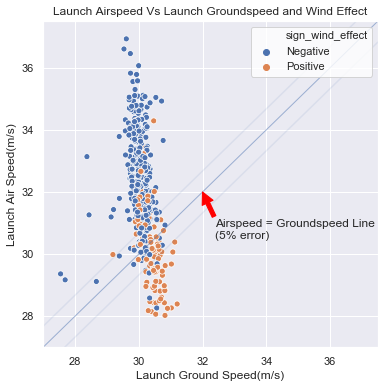

In [10]:
# Plot groundspeed vs Airspeed

# Define wind effect sign as new column 

summary_data['sign_wind_effect'] = np.nan
summary_data['sign_wind_effect'] =  summary_data['launch_wind_effect'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')



plt.figure(figsize=(6, 6))
ax = sns.scatterplot(x='launch_groundspeed',y='launch_airspeed',data=summary_data, hue='sign_wind_effect' )
ax.set(xlim=(27,37.5),ylim=(27,37.5))
plt.plot([27, 37.5], [27, 37.5], linewidth=1, ls='-',alpha=0.5)
plt.plot([27, 37.5], [27.675,38.175], ls='-', alpha=0.1, color='b')
plt.plot([27, 37.5], [26.325,36.825], ls='-', alpha=0.1, color='b')

plt.annotate('Airspeed = Groundspeed Line\n(5% error)', xy=(32,32), xytext=(32.4,30.5), arrowprops={'color':'red','lw':1.05})
plt.xlabel("Launch Ground Speed(m/s)")
plt.ylabel("Launch Air Speed(m/s)")
plt.title("Launch Airspeed Vs Launch Groundspeed and Wind Effect")
plt.legend(loc='upper right',facecolor='w')
plt.show()

### Launch Ground Speed

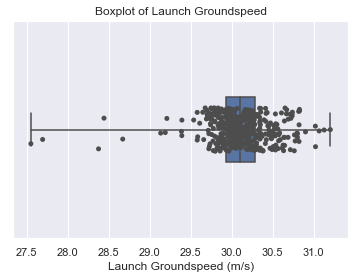

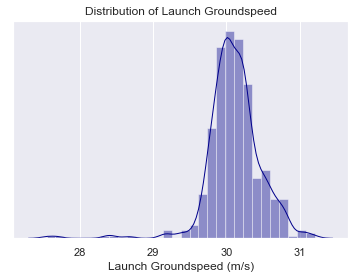

In [11]:
# Exploring 'Launch Groundspeed' 

# Boxplot and Stripplot 

ax = sns.boxplot(x="launch_groundspeed", data=summary_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="launch_groundspeed", hue="wing_serial_number",data=summary_data, jitter=0.1, color=".3")
plt.xlabel('Launch Groundspeed (m/s)')
plt.title('Boxplot of Launch Groundspeed')
plt.show()

# Density Plot

sns.distplot(summary_data['launch_groundspeed'], bins=30, kde=True, color = 'darkblue', kde_kws={'linewidth': 1})
plt.yticks([])
plt.xlabel('Launch Groundspeed (m/s)')
plt.title('Distribution of Launch Groundspeed')
plt.show()

In [12]:
# 95% groundspeed range

normal_range_groundspeed = np.percentile(summary_data['launch_groundspeed'],[2.5,97.5])
print ('The 95 percent of all flights have ground speed in this range:')
print (normal_range_groundspeed)

std_groundspeed = np.std(summary_data['launch_groundspeed'])
print ('The standard deviation of launching ground speed is: %.2f'   %std_groundspeed)

The 95 percent of all flights have ground speed in this range:
[29.543113   30.80374629]
The standard deviation of launching ground speed is: 0.37


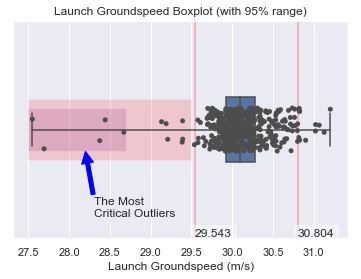

In [13]:
# Find flights with groundspeed out of range 

ax = sns.boxplot(x="launch_groundspeed", data=summary_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="launch_groundspeed",data=summary_data, jitter=0.1, color=".3")
plt.xlabel('Launch Groundspeed (m/s)')

ymin, ymax = ax.get_ylim()

ax.vlines(x=normal_range_groundspeed[0], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.vlines(x=normal_range_groundspeed[-1], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.text(normal_range_groundspeed[0], 0.02 , "%.3f" %normal_range_groundspeed[0], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax.text(normal_range_groundspeed[-1], 0.02 , "%.3f" %normal_range_groundspeed[-1], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax.fill_between([27.5,29.5], 0.14, -0.14, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([27.5,28.7], 0.1, -0.1, facecolor='purple', alpha = .15, interpolate=True)
plt.annotate('The Most\nCritical Outliers', xy=(28.2,0.1), xytext=(28.3,0.4), arrowprops={'color':'blue','lw':1.05})

plt.title('Launch Groundspeed Boxplot (with 95% range)')
plt.show()

The above figure shows that *** lower bound *** of launch ground speed have extreme outliers. So let's filter them out as new dataset and dive into them more in depth: 

In [14]:
# Ground speed : lower bound Outlier flights 

outlier_data_groundspeed = summary_data[(summary_data['launch_groundspeed']< normal_range_groundspeed[0])]

print ('\nThe number of flights with launch airspeed out of predefined normal range is:' + '\033[1m' + ' %d ' %len(outlier_data_groundspeed) + '\033[0m' )



print ('\nThere are' + '\033[1m' + ' %d ' %outlier_data_groundspeed['battery_serial_number'].nunique() + '\033[0m' + 'unique batteries.')
print ('There are' + '\033[1m' + ' %d ' %outlier_data_groundspeed['body_serial_number'].nunique()+ '\033[0m' + 'unique bodies.')
print ('There are' + '\033[1m' + ' %d ' %outlier_data_groundspeed['wing_serial_number'].nunique() + '\033[0m' + 'unique wings.')
print ('There are' + '\033[1m' + ' %d ' %outlier_data_groundspeed['commit'].nunique() + '\033[0m' + 'unique versions of program.')


The number of flights with launch airspeed out of predefined normal range is: 12 

There are 10 unique batteries.
There are 8 unique bodies.
There are 8 unique wings.
There are 2 unique versions of program.


### Groundspeed Vs. Bodies & Wings

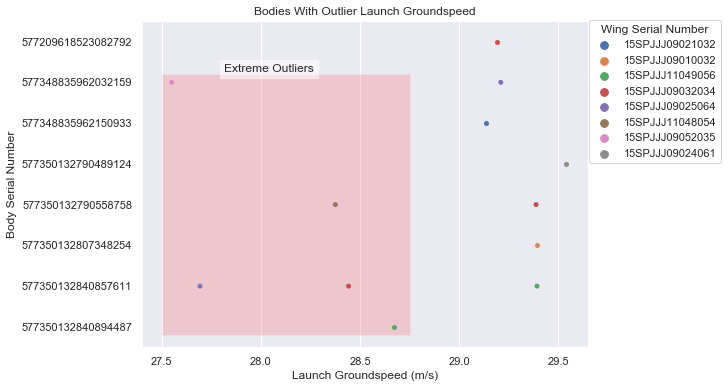

In [15]:
# Going more in depth for lower bound launch groundspeed outliers 

plt.figure(figsize=(8, 6))
ax1 = sns.swarmplot(x="launch_groundspeed", y="body_serial_number", hue="wing_serial_number", orient="h", data=outlier_data_groundspeed)
plt.title("Bodies With Outlier Launch Groundspeed")
plt.ylabel("Body Serial Number")
plt.xlabel("Launch Groundspeed (m/s)")
plt.legend(title='Wing Serial Number',loc='upper right', bbox_to_anchor=(1.31, 1.02),facecolor='w')
ax1.text(29.4, 1.3 , 'Extreme Outliers', va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax1.fill_between([27.5,28.75], 0.8, 7.2, facecolor='red', alpha = .15, interpolate=True)

plt.show()

#### Groundspeed Vs. Battery & Preflight Voltage 

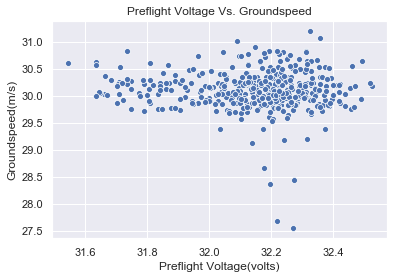

In [16]:
# Exploring Preflight voltage in Groundspeed

summary_data_no_nan = summary_data.dropna()
ax = sns.scatterplot(x="preflight_voltage", y="launch_groundspeed", data=summary_data_no_nan)
plt.xlabel("Preflight Voltage(volts)")
plt.ylabel("Groundspeed(m/s)")
plt.title("Preflight Voltage Vs. Groundspeed")
plt.show()

The 95 percent of all flights have ground speed in this range: [31.70443058 32.42690754]
The standard deviation of launching ground speed is: 0.37


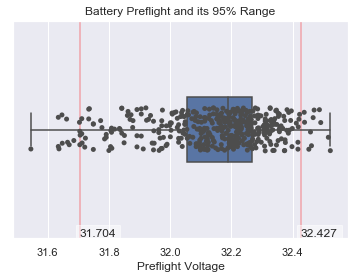

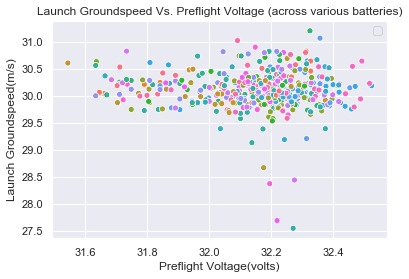

In [17]:
# Exploring Batteries

# Voltage Boxplot 

ax = sns.boxplot(x="preflight_voltage", data=summary_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="preflight_voltage",data=summary_data, jitter=0.1, color=".3")
plt.xlabel('Preflight Voltage')

normal_range_voltage = np.percentile(summary_data_no_nan['preflight_voltage'],[2.5,97.5])
print ('The 95 percent of all flights have ground speed in this range:',normal_range_voltage)

std_voltgae = np.std(summary_data_no_nan['preflight_voltage'])
print ('The standard deviation of launching ground speed is: %.2f'   %std_groundspeed)



ax.vlines(x=normal_range_voltage[0], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.vlines(x=normal_range_voltage[-1], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.text(normal_range_voltage[0], 0.02 , "%.3f" %normal_range_voltage[0], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax.text(normal_range_voltage[-1], 0.02 , "%.3f" %normal_range_voltage[-1], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())


plt.title('Battery Preflight and its 95% Range')
plt.show()

# Preflight voltage vs Launch Groundspeed based on Battery Serial Number

summary_data_no_nan = summary_data.dropna()
ax2 = sns.scatterplot(x="preflight_voltage", y="launch_groundspeed", data=summary_data_no_nan, hue='battery_serial_number')
plt.xlabel("Preflight Voltage(volts)")
plt.ylabel("Launch Groundspeed(m/s)")
plt.title("Launch Groundspeed Vs. Preflight Voltage (across various batteries)")
plt.legend("")
plt.show()

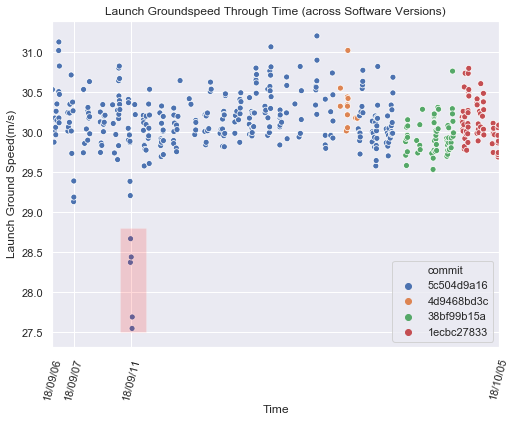

In [18]:
# Groundspeed through time and different software version (commit)

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x="launch_timestamp", y="launch_groundspeed", data=summary_data , hue='commit')
ax.set(xlim=(summary_data['launch_timestamp'].iloc[0],summary_data['launch_timestamp'].iloc[-1] ),xticks=[summary_data['launch_timestamp'].iloc[0],summary_data['launch_timestamp'].iloc[-1],summary_data['launch_timestamp'].iloc[86],summary_data['launch_timestamp'].iloc[30]])
ax.set_xticklabels([summary_data['launch_timestamp'].iloc[0],summary_data['launch_timestamp'].iloc[30],summary_data['launch_timestamp'].iloc[86],summary_data['launch_timestamp'].iloc[-1]],rotation=75)
myFmt = DateFormatter("%y/%m/%d")
ax.xaxis.set_major_formatter(myFmt)
plt.xlabel("Time")
plt.ylabel("Launch Ground Speed(m/s)")
plt.title("Launch Groundspeed Through Time (across Software Versions)")

ax.fill_between([summary_data['launch_timestamp'].iloc[72],summary_data['launch_timestamp'].iloc[99]], 27.5, 28.8, facecolor='red', alpha = .15, interpolate=True)

plt.show()

### Extreme Launch Groundspeed Outliers

In [19]:
# Extreme launch groundspeed 

extreme_outlier_data_groundspeed = summary_data[(summary_data['launch_groundspeed']< 29)]

print (extreme_outlier_data_groundspeed.head(10))

print (extreme_outlier_data_groundspeed[['launch_timestamp','commit']])

    flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
84      17124            26.90       15SPJJJ10040016  577350132790558758  5c504d9a16   
85      17125            26.70       15SPJJJ09036021  577350132840894487  5c504d9a16   
86      17126            28.50       15SPJJJ11059037  577350132840857611  5c504d9a16   
87      17128            34.60       15SPJJJ10022048  577348835962032159  5c504d9a16   
88      17130            32.05       15SPJJJ10054027  577350132840857611  5c504d9a16   

    launch_airspeed  launch_groundspeed    launch_timestamp  preflight_voltage  \
84        33.137989           28.375102 2018-09-11 11:10:13          32.195175   
85        29.118519           28.670392 2018-09-11 11:27:43          32.175728   
86        31.262791           28.441710 2018-09-11 12:31:23          32.275120   
87        29.363268           27.548899 2018-09-11 13:50:00          32.270798   
88        29.171434           27.692286 2018-09-11 14:09:32  

### points

All 5 flights with extremely low launch ground speed occured at the same day: ** 2018-09-11 ** <br>
All 5 flights with extremely low launch ground speed happened while using the same version of software: ** 5c504d9a16  ** <br>
Other factors (Body, wing, battery, pressure, temperature) do not show anything unusal. 



In [20]:
# Flight Ids of 5 extreme outliers of Launch ground speed:

print (summary_data['flight_id'].iloc[[84,85,86,87,88],])

84    17124
85    17125
86    17126
87    17128
88    17130
Name: flight_id, dtype: int64


*** Let's check other flights on the same day (2018-09-11): ***

In [21]:
# Special Day (2018-09-11) Exploration:

special_day_data = summary_data[(summary_data['launch_timestamp'] > '2018-09-11') & (summary_data['launch_timestamp'] < '2018-09-12')]

print (special_day_data)

    flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
75      17112        22.700000       15SPJJJ10050016  577350132790558758  5c504d9a16   
76      17113        22.650000       15SPJJJ10012034  577348835962032159  5c504d9a16   
77      17114        23.925028       15SPJJJ10048030  577350132840894487  5c504d9a16   
78      17115        21.900000       15SPJJJ10005031  577350132840857611  5c504d9a16   
79      17119        25.050000       15SPJJJ10050016  577209618523082792  5c504d9a16   
80      17120        25.125007       15SPJJJ10029029  577350132840894487  5c504d9a16   
81      17121        26.700000       15SPJJJ09013015  577350132840857611  5c504d9a16   
82      17122        27.550000       15SPJJJ10022048  577350132790558758  5c504d9a16   
83      17123        26.975008       15SPJJJ09010022  577348835962032159  5c504d9a16   
84      17124        26.900000       15SPJJJ10040016  577350132790558758  5c504d9a16   
85      17125        26.700000  

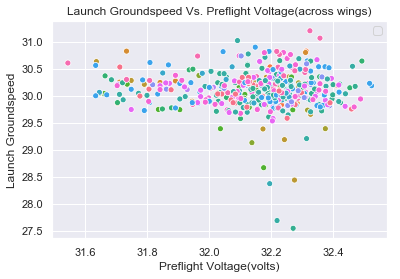

In [22]:
summary_data_no_nan = summary_data.dropna()
ax1 = sns.scatterplot(x="preflight_voltage", y="launch_groundspeed", data=summary_data_no_nan, hue='wing_serial_number')
plt.xlabel("Preflight Voltage(volts)")
plt.ylabel("Launch Groundspeed")
plt.legend("")
plt.title("Launch Groundspeed Vs. Preflight Voltage(across wings)")
plt.show()

### Launch Air Speed

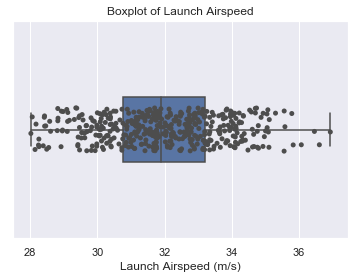

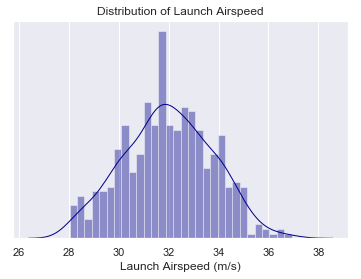

In [23]:
# Exploring 'Launch Airspeed' 

# Boxplot and Stripplot 

ax = sns.boxplot(x="launch_airspeed", data=summary_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="launch_airspeed", hue="wing_serial_number",data=summary_data, jitter=0.1, color=".3")
plt.xlabel('Launch Airspeed (m/s)')
plt.title('Boxplot of Launch Airspeed')
plt.show()

# Density Plot

sns.distplot(summary_data['launch_airspeed'], bins=30, kde=True, color = 'darkblue', kde_kws={'linewidth': 1})
plt.yticks([])
plt.xlabel('Launch Airspeed (m/s)')
plt.title('Distribution of Launch Airspeed')
plt.show()

The Airspeed Laucnh distribution looks normal. Let's check the normality of distribution with a statistical test: 

In [24]:
# Check the temp normal dist with normaltest 

result = stats.normaltest(summary_data['launch_airspeed'])
print (result)

NormaltestResult(statistic=5.296033557088243, pvalue=0.07079146909547301)


P = 0.07 > 0.05 ! So we can not reject the null hypothesis and the distribution is normal. 

Now, I assume that **95%** of our flights have launch airspeed within the acceptable range and any case with launch airspeed out of this range should be investigated more in depth. 

** In real world, acceptable range should be calculated and confirmed in collaboration with engineering and safety departments. ** 

In [25]:
# 95% airspeed range

normal_range = np.percentile(summary_data['launch_airspeed'],[2.5,97.5])
print (normal_range)

[28.47365704 35.10168228]


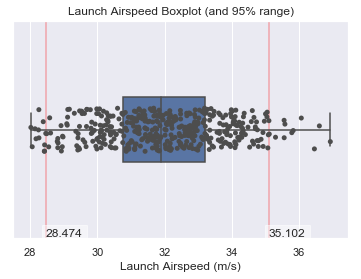

In [26]:
# Find flights with airspeed out of range 

ax = sns.boxplot(x="launch_airspeed", data=summary_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="launch_airspeed",data=summary_data, jitter=0.1, color=".3")
plt.xlabel('Launch Airspeed (m/s)')

ymin, ymax = ax.get_ylim()

ax.vlines(x=normal_range[0], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.vlines(x=normal_range[-1], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.text(normal_range[0], 0.02 , "%.3f" %normal_range[0], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax.text(normal_range[-1], 0.02 , "%.3f" %normal_range[-1], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())


plt.title('Launch Airspeed Boxplot (and 95% range)')
plt.show()

In [27]:
# Airspeed : Outlier flights 

outlier_data = summary_data[(summary_data['launch_airspeed']< normal_range[0]) | (summary_data['launch_airspeed']> normal_range[-1])]

print (outlier_data.head())
print ('\nThe number of flights with launch airspeed out of predefined normal range is:' + '\033[1m' + ' %d ' %len(outlier_data) + '\033[0m' )



print ('\nThere are' + '\033[1m' + ' %d ' %outlier_data['battery_serial_number'].nunique() + '\033[0m' + 'unique batteries.')
print ('There are' + '\033[1m' + ' %d ' %outlier_data['body_serial_number'].nunique()+ '\033[0m' + 'unique bodies.')
print ('There are' + '\033[1m' + ' %d ' %outlier_data['wing_serial_number'].nunique() + '\033[0m' + 'unique wings.')
print ('There are' + '\033[1m' + ' %d ' %outlier_data['commit'].nunique() + '\033[0m' + 'unique versions of program.')

    flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
11      16980        18.200000       15SPJJJ10052026  577348835962150933  5c504d9a16   
17      16988        18.376523       15SPJJJ10008029  577209618523082792  5c504d9a16   
67      17101        20.250000       15SPJJJ10023027  577209618523082792  5c504d9a16   
71      17107        20.750000       15SPJJJ10019016  577350132790558758  5c504d9a16   
73      17109        21.250000       15SPJJJ10052026  577350132807356452  5c504d9a16   

    launch_airspeed  launch_groundspeed    launch_timestamp  preflight_voltage  \
11        28.267582           31.022850 2018-09-06 17:46:38                NaN   
17        28.435474           30.474297 2018-09-06 18:59:13                NaN   
67        28.432875           30.803792 2018-09-10 16:50:14          32.310772   
71        28.151031           30.396295 2018-09-10 17:53:11          32.216782   
73        28.469389           30.350077 2018-09-10 18:12:25  

In [28]:
outlier_data.describe()

,flight_id,air_temperature,launch_airspeed,launch_groundspeed,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,launch_wind_effect
count,24.000000,24.000000,24.000000,24.000000,22.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,17379.708333,23.874022,32.051864,30.254189,32.159229,55.740344,80437.936070,-54.037644,3.088667,-0.507040
std,212.164104,4.802570,3.874901,0.473930,0.188704,7.468835,177.538378,101.211682,1.346498,2.618108
min,16980.000000,16.500000,28.027149,29.536639,31.634480,41.700000,80128.986507,-172.069946,1.042462,-4.218384
25%,17225.750000,20.325000,28.266954,29.881155,32.140617,50.675000,80296.684420,-150.714316,2.343891,-2.897246
50%,17412.500000,22.400000,31.786847,30.219580,32.207600,56.550000,80415.002493,-53.915689,2.915651,-0.880346
75%,17580.250000,28.400000,35.630537,30.545825,32.261345,58.512500,80581.245209,-27.524641,3.594762,1.981144
max,17636.000000,34.050000,36.929199,31.205293,32.387474,69.650000,80809.265480,173.524053,7.466193,3.435635


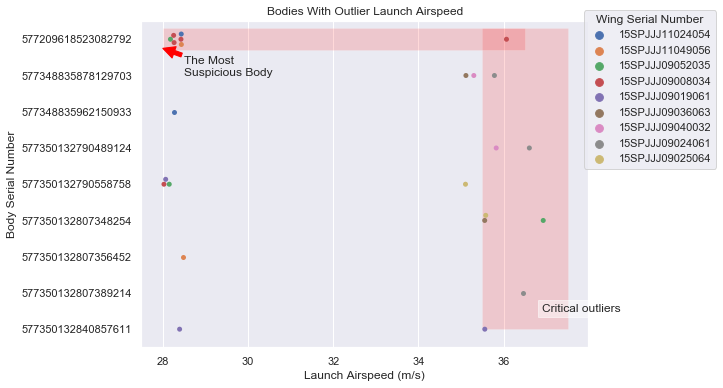

In [29]:
# Going more in depth for launch airspeed outliers 

plt.figure(figsize=(8, 6))
ax2 = sns.swarmplot(x="launch_airspeed", y="body_serial_number", hue="wing_serial_number", orient="h", data=outlier_data)
plt.title("Bodies With Outlier Launch Airspeed")
plt.ylabel("Body Serial Number")
plt.xlabel("Launch Airspeed (m/s)")
plt.legend(title='Wing Serial Number',loc='upper right', bbox_to_anchor=(1.3, 1.05))
ax2.text(42, 0.2 , 'Critical outliers', va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax2.fill_between([35.5,37.5], -0.3, 8, facecolor='red', alpha = .15, interpolate=True)
ax2.fill_between([28,36.5], -0.3, 0.3, facecolor='red', alpha = .15, interpolate=True)
plt.annotate('The Most\nSuspicious Body', xy=(28,0.25), xytext=(28.5,1), arrowprops={'color':'red','lw':1.05})
plt.show()

** There can be several different reasons - such as corrupted body, wing, launching rail, actuator motor, controling software, and even some extreme weather conditions - behind these outliers. **  

At the *** first glance *** a specific body ** serial number : 577209618523082792 ** shows more than 30% of all flights with launch airspeed out of normal range. So more in depth investigation on this body can be essential. 

### Extreme Launch Airspeed Outliers 

In [30]:
# Extreme launch airspeed 
extreme_outlier_data_airspeed = summary_data[(summary_data['launch_airspeed'] > 35.5)]

print (extreme_outlier_data_airspeed)

     flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
106      17162            25.80       15SPJJJ09018015  577350132807348254  5c504d9a16   
188      17312            28.95       15SPJJJ10029029  577350132840857611  5c504d9a16   
190      17315            30.15       15SPJJJ09017016  577209618523082792  5c504d9a16   
287      17512            34.05       15SPJJJ10029029  577350132807348254  5c504d9a16   
334      17590            22.85       15SPJJJ10019016  577350132790489124  38bf99b15a   
339      17595            20.45       15SPJJJ10050016  577350132807389214  38bf99b15a   
340      17596            23.80       15SPJJJ10056048  577350132790489124  38bf99b15a   
352      17615            28.35       15SPJJJ10050049  577350132807348254  38bf99b15a   
369      17636            30.00       15SPJJJ10023027  577348835878129703  38bf99b15a   

     launch_airspeed  launch_groundspeed    launch_timestamp  preflight_voltage  \
106        36.929199      

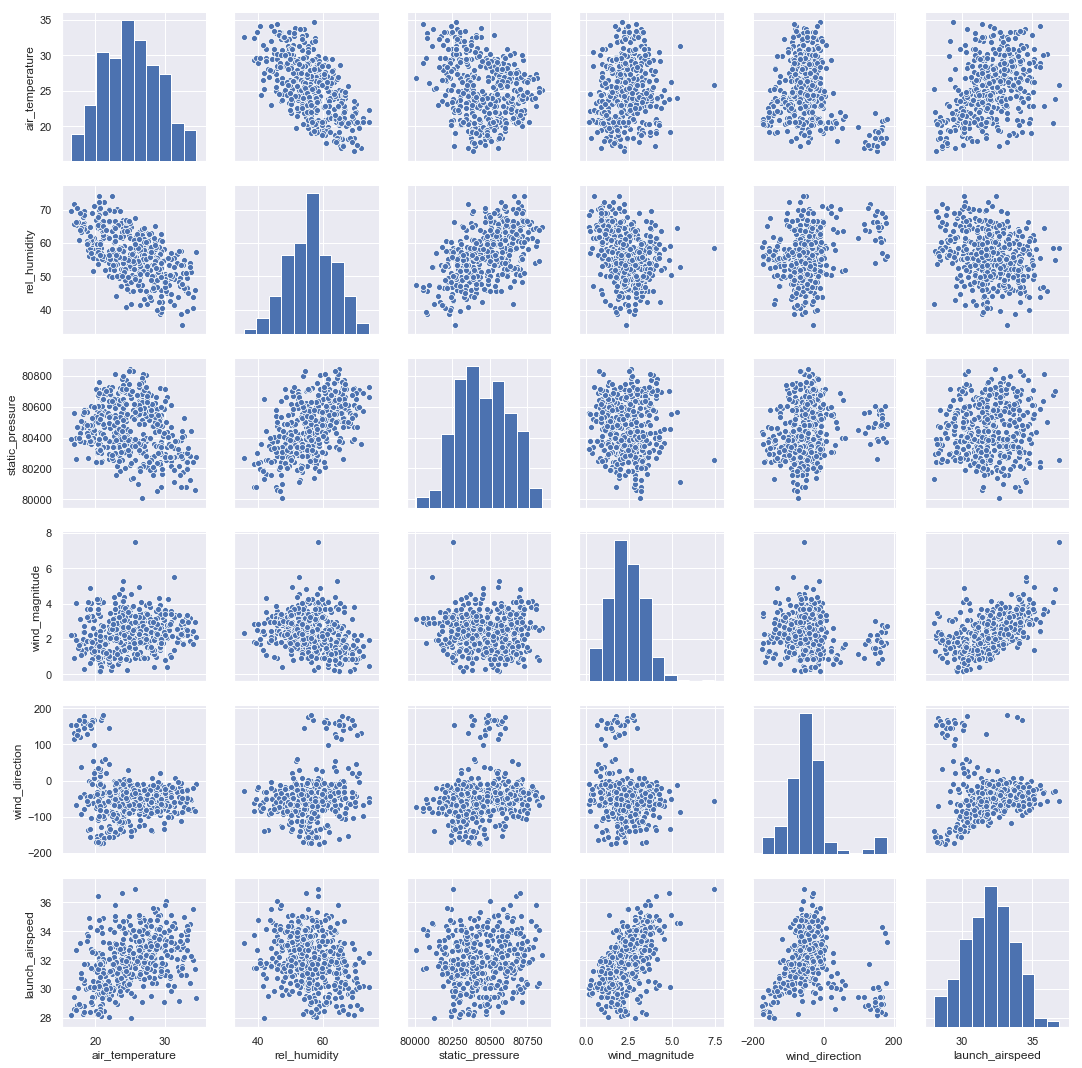

In [31]:
# Pairplot between Launch Airspeed and weather factors (for exploring the relationship with outliers)

sns.pairplot(summary_data, vars=['air_temperature','rel_humidity','static_pressure','wind_magnitude','wind_direction','launch_airspeed'])
plt.show()

Extreme Launch Airspeed Outliers do not show any relationship with weather factors! 

## Checking factors of outlier flights <font size='2'> (Airspeed out of normal range) 

### Bodies Exploration 

                    count  percentage
Body Serial Number                   
577350132790558758     69   15.436242
577350132807348254     63   14.093960
577348835962032159     54   12.080537
577350132840857611     45   10.067114
577209618523082792     37    8.277405
577350132840894487     32    7.158837
577350132807389214     26    5.816555
577348835878129703     23    5.145414
577350132790489124     23    5.145414
577348835962155029     22    4.921700
577350132807368710     20    4.474273
577348835962105883     14    3.131991
577348835962150933     13    2.908277
577209618523054122      3    0.671141
577350132807356452      3    0.671141
                    count  percentage of all outliers  percentage of its own flights
Body Serial Number                                                                  
577209618523082792      7                   29.166667                      18.918919
577350132790558758      4                   16.666667                       5.797101
57735013280734

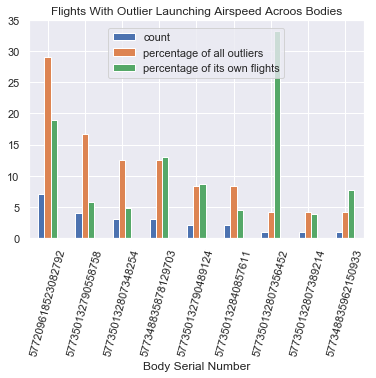

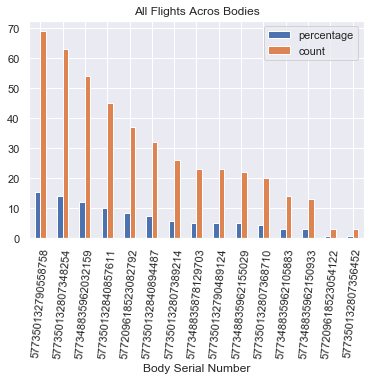

In [32]:
# Group summary_data

summary_data_body = pd.DataFrame(columns = ['count','percentage'])
summary_data_body['count'] = summary_data['body_serial_number'].value_counts()
summary_data_body['percentage'] = summary_data_body['count']*100/summary_data_body['count'].sum()
summary_data_body.index.name = 'Body Serial Number'
print (summary_data_body)

# Group outlier_data

outlier_data_body = pd.DataFrame(columns = ['count','percentage of all outliers','percentage of its own flights'])
outlier_data_body['count'] = outlier_data['body_serial_number'].value_counts()
outlier_data_body['percentage of all outliers'] = outlier_data_body['count']*100/outlier_data_body['count'].sum()
outlier_data_body['percentage of its own flights'] = outlier_data_body['count']*100/summary_data_body['count']
outlier_data_body.index.name = 'Body Serial Number'
print (outlier_data_body)

# Plot outlier bodies 

outlier_data_body.plot(y=[ "count","percentage of all outliers","percentage of its own flights"], kind="bar")
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.85))
plt.title("Flights With Outlier Launching Airspeed Acroos Bodies")
plt.xticks( rotation='75')
plt.show()

# Plot summary bodies

summary_data_body.plot(y=["percentage", "count"], kind="bar")
plt.title("All Flights Acros Bodies")
plt.xticks( rotation='85')
plt.show()

### Wings Exploration

                    count  percentage
Wing Serial Number                   
15SPJJJ09008034        65   14.541387
15SPJJJ09025064        58   12.975391
15SPJJJ09052035        51   11.409396
15SPJJJ09024061        45   10.067114
15SPJJJ09040032        44    9.843400
15SPJJJ09031032        27    6.040268
15SPJJJ11049056        24    5.369128
15SPJJJ09019061        23    5.145414
15SPJJJ09043062        22    4.921700
15SPJJJ09036063        17    3.803132
15SPJJJ09032034        15    3.355705
15SPJJJ09028034        14    3.131991
15SPJJJ11024054        13    2.908277
15SPJJJ09011032        11    2.460850
15SPJJJ09021032         8    1.789709
15SPJJJ09010032         5    1.118568
15SPJJJ09028064         4    0.894855
15SPJJJ11048054         1    0.223714
                    count  percentage of all outliers  percentage of its own flights
Wing Serial Number                                                                  
15SPJJJ09008034         5                   20.833333                 

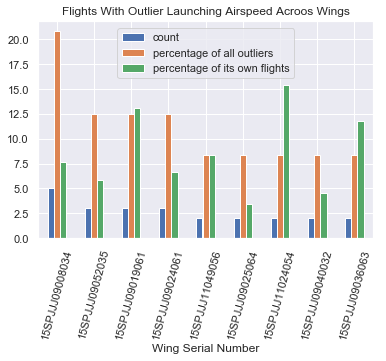

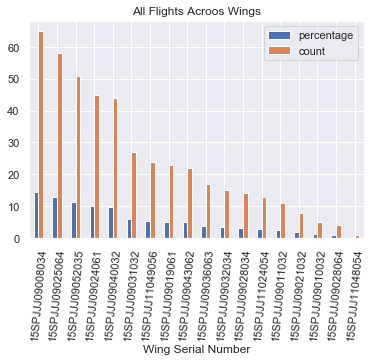

In [33]:
# Group summary_data

summary_data_wing = pd.DataFrame(columns = ['count','percentage'])
summary_data_wing['count'] = summary_data['wing_serial_number'].value_counts()
summary_data_wing['percentage'] = summary_data_wing['count']*100/summary_data_wing['count'].sum()
summary_data_wing.index.name = 'Wing Serial Number'
print (summary_data_wing)

# Group outlier_data

outlier_data_wing = pd.DataFrame(columns = ['count','percentage of all outliers','percentage of its own flights'])
outlier_data_wing['count'] = outlier_data['wing_serial_number'].value_counts()
outlier_data_wing['percentage of all outliers'] = outlier_data_wing['count']*100/outlier_data_wing['count'].sum()
outlier_data_wing['percentage of its own flights'] = outlier_data_wing['count']*100/summary_data_wing['count']
outlier_data_wing.index.name = 'Wing Serial Number'
print (outlier_data_wing)

# Plot outlier bodies 

outlier_data_wing.plot(y=[ "count","percentage of all outliers","percentage of its own flights"], kind="bar")
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.85))
plt.title("Flights With Outlier Launching Airspeed Acroos Wings")
plt.xticks( rotation='75')
plt.show()

# Plot all bodies

summary_data_wing.plot(y=["percentage", "count"], kind="bar")
plt.title("All Flights Acroos Wings")
plt.xticks( rotation='85')
plt.show()

### Batteries 

The 95 percent of all flights have preflight voltage in this range: [31.70443058 32.42690754]
The standard deviation of preflight voltage: 0.37


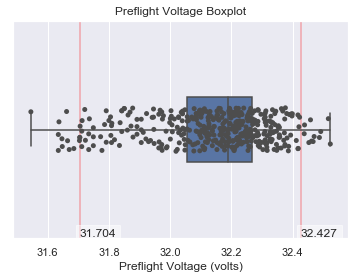

In [34]:
# Exploring Batteries

normal_range_voltage = np.percentile(summary_data_no_nan['preflight_voltage'],[2.5,97.5])
print ('The 95 percent of all flights have preflight voltage in this range:',normal_range_voltage)

std_voltgae = np.std(summary_data_no_nan['preflight_voltage'])
print ('The standard deviation of preflight voltage: %.2f'   %std_groundspeed)

# Voltage Boxplot 

ax = sns.boxplot(x="preflight_voltage", data=summary_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="preflight_voltage",data=summary_data, jitter=0.1, color=".3")
plt.xlabel('Preflight Voltage (volts)')
plt.title("Preflight Voltage Boxplot")
ax.vlines(x=normal_range_voltage[0], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.vlines(x=normal_range_voltage[-1], ymin=ymin,ymax=ymax, alpha=0.3, color='red')
ax.text(normal_range_voltage[0], 0.02 , "%.3f" %normal_range_voltage[0], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())
ax.text(normal_range_voltage[-1], 0.02 , "%.3f" %normal_range_voltage[-1], va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_xaxis_transform())

plt.show()

                       count  percentage
Battery Serial Number                   
15SPJJJ10012034           31    6.935123
15SPJJJ10029029           27    6.040268
15SPJJJ09036021           26    5.816555
15SPJJJ10050016           26    5.816555
15SPJJJ09018015           24    5.369128
15SPJJJ11059037           23    5.145414
15SPJJJ10040016           22    4.921700
15SPJJJ10022048           21    4.697987
15SPJJJ09010022           21    4.697987
15SPJJJ10021047           21    4.697987
15SPJJJ10019016           20    4.474273
15SPJJJ10054027           19    4.250559
15SPJJJ10023027           19    4.250559
15SPJJJ10056048           18    4.026846
15SPJJJ10048030           18    4.026846
15SPJJJ10060032           18    4.026846
15SPJJJ10007045           15    3.355705
15SPJJJ10050049           13    2.908277
15SPJJJ10052026           12    2.684564
15SPJJJ10030028           11    2.460850
15SPJJJ10018016           10    2.237136
15SPJJJ10027028           10    2.237136
15SPJJJ09017016 

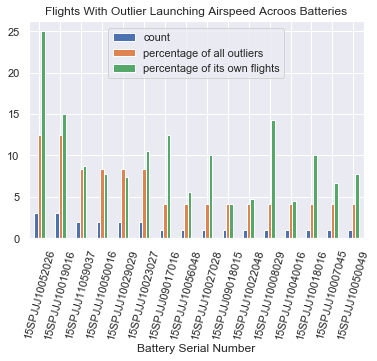

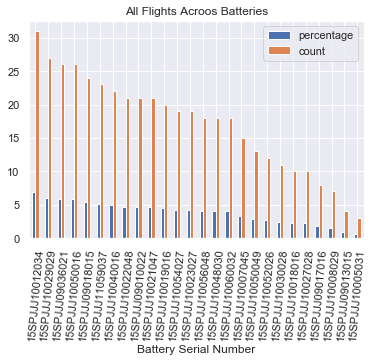

In [35]:
# Group summary_data

summary_data_battery = pd.DataFrame(columns = ['count','percentage'])
summary_data_battery['count'] = summary_data['battery_serial_number'].value_counts()
summary_data_battery['percentage'] = summary_data_battery['count']*100/summary_data_battery['count'].sum()
summary_data_battery.index.name = 'Battery Serial Number'
print (summary_data_battery)

# Group outlier_data

outlier_data_battery = pd.DataFrame(columns = ['count','percentage of all outliers','percentage of its own flights'])
outlier_data_battery['count'] = outlier_data['battery_serial_number'].value_counts()
outlier_data_battery['percentage of all outliers'] = outlier_data_battery['count']*100/outlier_data_battery['count'].sum()
outlier_data_battery['percentage of its own flights'] = outlier_data_battery['count']*100/summary_data_battery['count']
outlier_data_battery.index.name = 'Battery Serial Number'
print (outlier_data_battery)

# Plot outlier bodies 

outlier_data_battery.plot(y=[ "count","percentage of all outliers","percentage of its own flights"], kind="bar")
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.85))
plt.title("Flights With Outlier Launching Airspeed Acroos Batteries")
plt.xticks( rotation='75')
plt.show()

# Plot all bodies

summary_data_battery.plot(y=["percentage", "count"], kind="bar")
plt.title("All Flights Acroos Batteries")
plt.xticks( rotation='85')
plt.show()

Checking the flights that have NaN value for preflight voltage: 

In [36]:
# Exploring NaN for preflight voltage

NaN_preflight_voltage_data = summary_data[summary_data['preflight_voltage'].isnull()]

print (NaN_preflight_voltage_data)

    flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
0       16951        20.550000       15SPJJJ09036021  577350132807348254  5c504d9a16   
1       16952        20.500000       15SPJJJ10029029  577209618523054122  5c504d9a16   
2       16954        24.475019       15SPJJJ10012034  577209618523054122  5c504d9a16   
3       16955        27.300000       15SPJJJ10054027  577209618523082792  5c504d9a16   
4       16957        26.950000       15SPJJJ10050049  577348835962150933  5c504d9a16   
5       16959        28.574951       15SPJJJ09018015  577350132840857611  5c504d9a16   
6       16960        27.550000       15SPJJJ09017016  577209618523082792  5c504d9a16   
7       16961        28.250000       15SPJJJ10023027  577350132807348254  5c504d9a16   
8       16962        28.600000       15SPJJJ10052026  577350132840857611  5c504d9a16   
9       16965        32.250000       15SPJJJ10029029  577209618523054122  5c504d9a16   
10      16967        32.400000  

All ** NaN ** values for preflight voltage occured at the first date ** 2018-09-06**

### Software Exploration

                        count  percentage
Software Serial Number                   
5c504d9a16                310   69.351230
1ecbc27833                 65   14.541387
38bf99b15a                 60   13.422819
4d9468bd3c                 12    2.684564
                  count  percentage of all outliers  percentage of its own flights
Software Version                                                                  
5c504d9a16           17                   70.833333                       5.483871
38bf99b15a            7                   29.166667                      11.666667


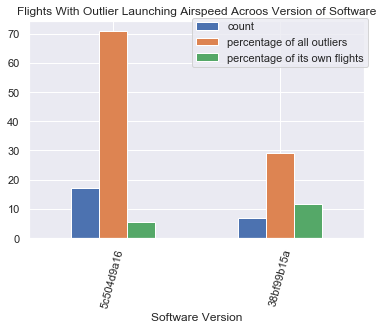

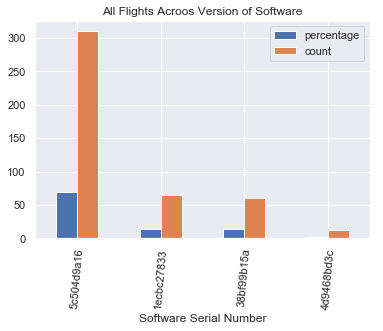

In [37]:
# Group summary_data

summary_data_software = pd.DataFrame(columns = ['count','percentage'])
summary_data_software['count'] = summary_data['commit'].value_counts()
summary_data_software['percentage'] = summary_data_software['count']*100/summary_data_software['count'].sum()
summary_data_software.index.name = 'Software Serial Number'
print (summary_data_software)

# Group outlier_data

outlier_data_software = pd.DataFrame(columns = ['count','percentage of all outliers','percentage of its own flights'])
outlier_data_software['count'] = outlier_data['commit'].value_counts()
outlier_data_software['percentage of all outliers'] = outlier_data_software['count']*100/outlier_data_software['count'].sum()
outlier_data_software['percentage of its own flights'] = outlier_data_software['count']*100/summary_data_software['count']
outlier_data_software.index.name = 'Software Version'
print (outlier_data_software)

# Plot outlier bodies 

outlier_data_software.plot(y=[ "count","percentage of all outliers","percentage of its own flights"], kind="bar")
plt.legend(loc='center', bbox_to_anchor=(0.75, 0.9))
plt.title("Flights With Outlier Launching Airspeed Acroos Version of Software")
plt.xticks( rotation='75')
plt.show()

# Plot all bodies

summary_data_software.plot(y=["percentage", "count"], kind="bar")
plt.title("All Flights Acroos Version of Software")
plt.xticks( rotation='85')
plt.show()

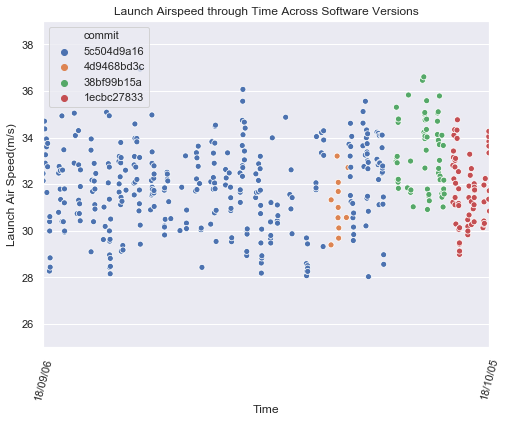

In [38]:
# Airspeed through time and different software version (commit)

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x="launch_timestamp", y="launch_airspeed", data=summary_data , hue='commit')
ax.set(xlim=(summary_data['launch_timestamp'].iloc[0],summary_data['launch_timestamp'].iloc[-1] ),xticks=[summary_data['launch_timestamp'].iloc[0],summary_data['launch_timestamp'].iloc[-1]],ylim=(25,39))
ax.set_xticklabels([summary_data['launch_timestamp'].iloc[0],summary_data['launch_timestamp'].iloc[-1]],rotation=75)
myFmt = DateFormatter("%y/%m/%d")
ax.xaxis.set_major_formatter(myFmt)
plt.xlabel("Time")
plt.ylabel("Launch Air Speed(m/s)")
plt.title("Launch Airspeed through Time Across Software Versions")

plt.show()

# Open All Flights Together

In [39]:
import glob
import os
os.chdir("mydir")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [40]:
# open all flights data 

all_flight_data = pd.read_csv("combined_csv.csv")


print (all_flight_data.info())
print (all_flight_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447276 entries, 0 to 447275
Data columns (total 19 columns):
seconds_since_launch          447276 non-null float64
position_ned_m[0]             447276 non-null float64
position_ned_m[1]             447276 non-null float64
position_ned_m[2]             447276 non-null float64
velocity_ned_mps[0]           447276 non-null float64
velocity_ned_mps[1]           447276 non-null float64
velocity_ned_mps[2]           447276 non-null float64
accel_body_mps2[0]            447276 non-null float64
accel_body_mps2[1]            447276 non-null float64
accel_body_mps2[2]            447276 non-null float64
orientation_rad[0]            447276 non-null float64
orientation_rad[1]            447276 non-null float64
orientation_rad[2]            447276 non-null float64
angular_rate_body_radps[0]    447276 non-null float64
angular_rate_body_radps[1]    447276 non-null float64
angular_rate_body_radps[2]    447276 non-null float64
position_sigma_ned_m[0]  

In [41]:
all_flight_data.head()

,seconds_since_launch,position_ned_m[0],position_ned_m[1],position_ned_m[2],velocity_ned_mps[0],velocity_ned_mps[1],velocity_ned_mps[2],accel_body_mps2[0],accel_body_mps2[1],accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
0,-4.99846,4.231279,7.630940,-3.660594,0.0,0.0,0.0,2.110368,-0.111244,-9.509400,0.008766,0.219311,2.741324,0.000130,0.003485,-0.001649,0.386206,0.599996,0.996637
1,-4.97847,4.233233,7.629527,-3.670577,0.0,0.0,0.0,2.194296,-0.089524,-9.498604,0.008764,0.219312,2.741324,0.000752,0.000484,0.000165,0.386226,0.600015,0.996702
2,-4.95848,4.233233,7.629527,-3.670577,0.0,0.0,0.0,2.101853,-0.132758,-9.545670,0.008763,0.219317,2.741324,0.001264,0.000471,0.003963,0.386226,0.600015,0.996702
3,-4.93848,4.233233,7.629527,-3.670577,0.0,0.0,0.0,2.200457,-0.167910,-9.617673,0.008760,0.219321,2.741323,-0.000200,-0.001017,0.002217,0.386226,0.600015,0.996702
4,-4.91849,4.233163,7.629919,-3.668041,0.0,0.0,0.0,2.023391,-0.081116,-9.536364,0.008753,0.219324,2.741321,0.001770,0.000613,-0.001431,0.386245,0.600031,0.996764


In [42]:
# Launching Data for All Flights 


launch_all_flight_data = all_flight_data[all_flight_data['seconds_since_launch'] == 0.00]
launch_all_flight_data.head()
launch_all_flight_data=launch_all_flight_data.reset_index(drop=True)

In [43]:
launch_all_flight_data.describe()

,seconds_since_launch,position_ned_m[0],position_ned_m[1],position_ned_m[2],velocity_ned_mps[0],velocity_ned_mps[1],velocity_ned_mps[2],accel_body_mps2[0],accel_body_mps2[1],accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
count,447.0,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,0.0,-5.310975,11.389717,-6.794942,-26.993758,11.407491,-5.760448,-0.705053,0.683484,-5.947219,0.016287,0.173738,2.723800,0.172207,-0.382948,0.045640,0.385596,0.559638,0.770893
std,0.0,2.387740,1.181644,1.732940,5.343348,1.804760,0.282179,2.153657,0.826673,2.123645,0.018243,0.007522,0.282427,0.257098,0.133580,0.051489,0.241529,0.275392,0.449853
min,0.0,-8.216194,3.158927,-22.957960,-28.224340,-7.633120,-6.586242,-6.470652,-1.716199,-15.428008,-0.026216,0.154072,-0.247740,-0.581922,-0.691765,-0.112558,0.088344,0.167317,0.228966
25%,0.0,-6.013388,11.024844,-7.289419,-27.630246,11.450470,-5.942978,-2.203084,0.209261,-7.134403,0.003365,0.168587,2.748934,0.021650,-0.482535,0.012561,0.196604,0.276633,0.436382
50%,0.0,-5.521571,11.391612,-6.442967,-27.517944,11.574061,-5.760223,-0.640467,0.696374,-5.749797,0.015108,0.173631,2.750479,0.168298,-0.360226,0.045080,0.343163,0.588113,0.659343
75%,0.0,-5.066397,11.876732,-6.182534,-27.424705,11.712077,-5.575014,0.672287,1.176768,-4.632377,0.027554,0.177750,2.752171,0.317774,-0.276394,0.078112,0.525383,0.751445,0.996999
max,0.0,19.043728,14.561997,5.264806,29.198093,12.215570,-4.969774,5.883190,4.030827,0.940076,0.076949,0.198361,2.761749,0.932937,-0.141999,0.365751,2.212527,1.759297,2.806894


## Position to Refrence 

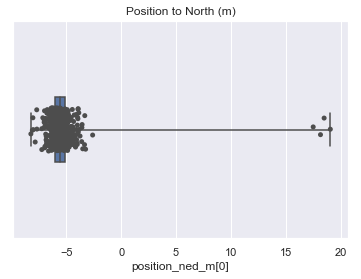

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
116                   0.0          19.043728           3.849141          -6.444817   
124                   0.0          17.485290           4.343673          -5.495336   
270                   0.0          18.148804           3.158927          -6.448410   
330                   0.0          18.479887           3.311047          -6.407100   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
116            29.077562            -7.417872            -5.690685            1.450984   
124            28.887917            -7.633120            -5.241509           -0.747501   
270            29.198093            -7.539916            -5.913353            0.850778   
330            29.180534            -7.108877            -5.820487           -2.477108   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
116            0.529479        

In [44]:
#  Boxplot 

ax = sns.boxplot(x="position_ned_m[0]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="position_ned_m[0]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Position to North (m)")

plt.show()

# Outliers 

out_position_north = launch_all_flight_data[launch_all_flight_data['position_ned_m[0]']>15]
print (out_position_north)


print (summary_data['flight_id'].iloc[[116,124,270,330],])

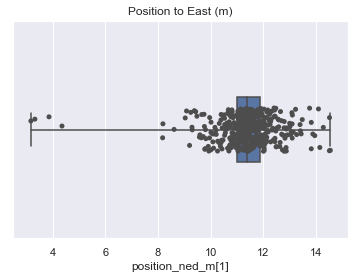

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
116                   0.0          19.043728           3.849141          -6.444817   
124                   0.0          17.485290           4.343673          -5.495336   
270                   0.0          18.148804           3.158927          -6.448410   
330                   0.0          18.479887           3.311047          -6.407100   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
116            29.077562            -7.417872            -5.690685            1.450984   
124            28.887917            -7.633120            -5.241509           -0.747501   
270            29.198093            -7.539916            -5.913353            0.850778   
330            29.180534            -7.108877            -5.820487           -2.477108   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
116            0.529479        

In [45]:
#  Boxplot 

ax = sns.boxplot(x="position_ned_m[1]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="position_ned_m[1]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Position to East (m)")

plt.show()

# Outliers

out_position_east = launch_all_flight_data[launch_all_flight_data['position_ned_m[1]']<6]
print (out_position_east)

print (summary_data['flight_id'].iloc[[116,124,270,330],])

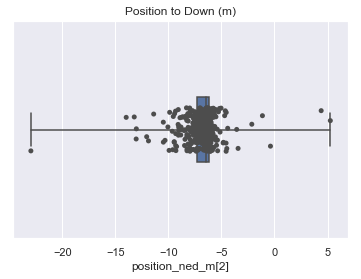

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
104                   0.0          -3.911195          10.896087           4.402460   
162                   0.0          -4.054032          11.513007         -22.957960   
326                   0.0          -3.741330          10.216327           5.264806   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
104           -27.572248            11.647571            -5.684027           -3.980699   
162           -27.497446            11.346660            -5.760484           -1.241906   
326           -27.732819            11.894121            -5.370988           -2.584095   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
104            1.158765           -3.593390           -0.009297            0.173411   
162            0.063955           -3.601417            0.008470            0.155597   
326            1.167381          

In [46]:
#  Boxplot 

ax = sns.boxplot(x="position_ned_m[2]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="position_ned_m[2]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Position to Down (m)")

plt.show()

# Outliers 

out_position_down = launch_all_flight_data[(launch_all_flight_data['position_ned_m[2]']<-15) | (launch_all_flight_data['position_ned_m[2]']>2) ]
print (out_position_down)

print (summary_data['flight_id'].iloc[[104,162,326],])

### Velocity

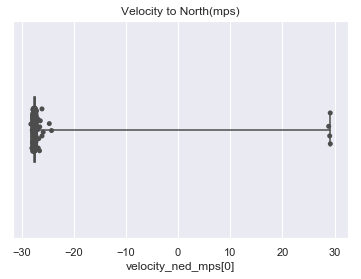

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
116                   0.0          19.043728           3.849141          -6.444817   
124                   0.0          17.485290           4.343673          -5.495336   
270                   0.0          18.148804           3.158927          -6.448410   
330                   0.0          18.479887           3.311047          -6.407100   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
116            29.077562            -7.417872            -5.690685            1.450984   
124            28.887917            -7.633120            -5.241509           -0.747501   
270            29.198093            -7.539916            -5.913353            0.850778   
330            29.180534            -7.108877            -5.820487           -2.477108   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
116            0.529479        

In [47]:
#  Boxplot 

ax = sns.boxplot(x="velocity_ned_mps[0]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="velocity_ned_mps[0]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Velocity to North(mps)")

plt.show()

# Outliers

out_velocity_north = launch_all_flight_data[launch_all_flight_data['velocity_ned_mps[0]']>20]
print (out_velocity_north)

print (summary_data['flight_id'].iloc[[116,124,270,330],])


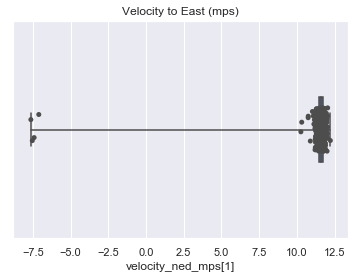

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
116                   0.0          19.043728           3.849141          -6.444817   
124                   0.0          17.485290           4.343673          -5.495336   
270                   0.0          18.148804           3.158927          -6.448410   
330                   0.0          18.479887           3.311047          -6.407100   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
116            29.077562            -7.417872            -5.690685            1.450984   
124            28.887917            -7.633120            -5.241509           -0.747501   
270            29.198093            -7.539916            -5.913353            0.850778   
330            29.180534            -7.108877            -5.820487           -2.477108   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
116            0.529479        

In [48]:
#  Boxplot 

ax = sns.boxplot(x="velocity_ned_mps[1]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="velocity_ned_mps[1]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Velocity to East (mps)")

plt.show()

# Outliers

out_velocity_east = launch_all_flight_data[launch_all_flight_data['velocity_ned_mps[1]']<-5]
print (out_velocity_east)

print (summary_data['flight_id'].iloc[[116,124,270,330],])

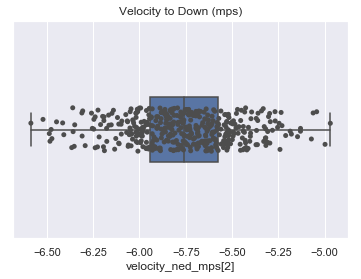

In [49]:
#  Boxplot 

ax = sns.boxplot(x="velocity_ned_mps[2]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="velocity_ned_mps[2]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Velocity to Down (mps)")

plt.show()

### Accelaration

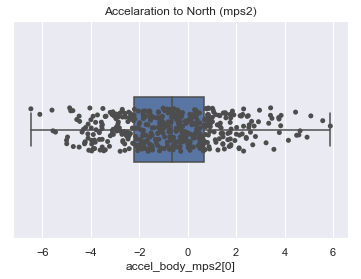

In [50]:
#  Boxplot 

ax = sns.boxplot(x="accel_body_mps2[0]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="accel_body_mps2[0]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Accelaration to North (mps2)")

plt.show()



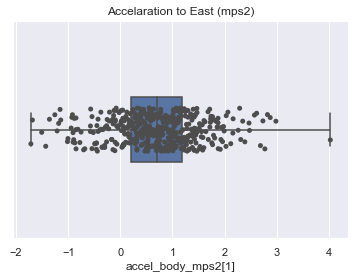

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
354                   0.0          -5.062461          10.732069          -5.903252   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
354           -27.663656            11.201587            -5.931274            1.219606   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
354            4.030827          -11.459914               0.039            0.198361   

     orientation_rad[2]  angular_rate_body_radps[0]  angular_rate_body_radps[1]  \
354            2.747536                    0.712513                   -0.356323   

     angular_rate_body_radps[2]  position_sigma_ned_m[0]  position_sigma_ned_m[1]  \
354                    0.110009                 0.185376                 0.448001   

     position_sigma_ned_m[2]  
354                 0.360028  
354    17619
Name: flight_id, dtype: int64


In [51]:
#  Boxplot 

ax = sns.boxplot(x="accel_body_mps2[1]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="accel_body_mps2[1]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Accelaration to East (mps2)")

plt.show()

# Outliers 

out_accel_east = launch_all_flight_data[launch_all_flight_data['accel_body_mps2[1]']>3]
print (out_accel_east)

print (summary_data['flight_id'].iloc[[354],])

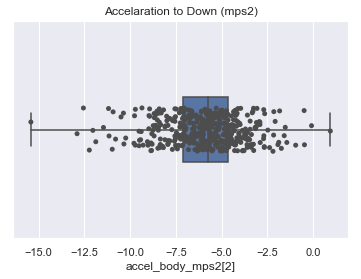

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
318                   0.0          -5.348414          11.356947          -6.215236   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
318           -27.787987            11.719297            -5.723566            3.767936   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
318             -1.0046          -15.428008           -0.006426            0.191049   

     orientation_rad[2]  angular_rate_body_radps[0]  angular_rate_body_radps[1]  \
318            2.747538                   -0.406085                   -0.375321   

     angular_rate_body_radps[2]  position_sigma_ned_m[0]  position_sigma_ned_m[1]  \
318                    0.028586                 0.322105                 0.532159   

     position_sigma_ned_m[2]  
318                 0.551357  
318    17568
Name: flight_id, dtype: int64


In [52]:
#  Boxplot 

ax = sns.boxplot(x="accel_body_mps2[2]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="accel_body_mps2[2]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Accelaration to Down (mps2)")

plt.show()

# OUTLIERS 

out_accel_down = launch_all_flight_data[launch_all_flight_data['accel_body_mps2[2]']<-15]
print (out_accel_down)

print (summary_data['flight_id'].iloc[[318],])

### Euler (Tait-Bryan)

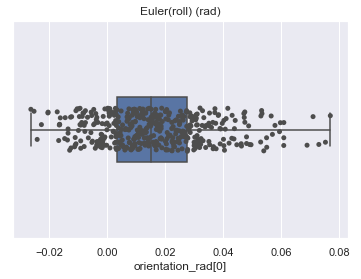

In [53]:
#  Boxplot 

ax = sns.boxplot(x="orientation_rad[0]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="orientation_rad[0]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Euler(roll) (rad)")

plt.show()

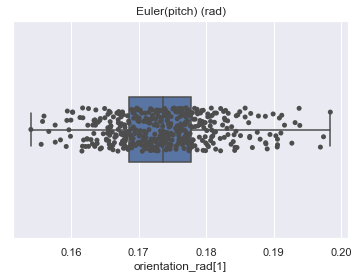

In [54]:
#  Boxplot 

ax = sns.boxplot(x="orientation_rad[1]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="orientation_rad[1]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Euler(pitch) (rad)")

plt.show()

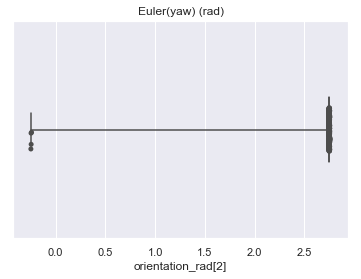

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
116                   0.0          19.043728           3.849141          -6.444817   
124                   0.0          17.485290           4.343673          -5.495336   
270                   0.0          18.148804           3.158927          -6.448410   
330                   0.0          18.479887           3.311047          -6.407100   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
116            29.077562            -7.417872            -5.690685            1.450984   
124            28.887917            -7.633120            -5.241509           -0.747501   
270            29.198093            -7.539916            -5.913353            0.850778   
330            29.180534            -7.108877            -5.820487           -2.477108   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
116            0.529479        

In [55]:
#  Boxplot 

ax = sns.boxplot(x="orientation_rad[2]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="orientation_rad[2]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Euler(yaw) (rad)")

plt.show()

# Outliers 

out_orient_yaw = launch_all_flight_data[launch_all_flight_data['orientation_rad[2]']<0]
print (out_orient_yaw)

print (summary_data['flight_id'].iloc[[116,124,270,330],])

### Angular Velocity

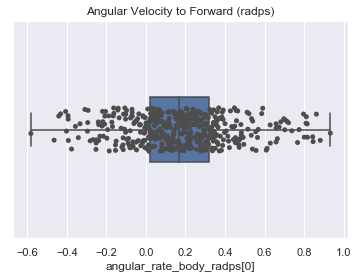

In [56]:
#  Boxplot 

ax = sns.boxplot(x="angular_rate_body_radps[0]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="angular_rate_body_radps[0]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Angular Velocity to Forward (radps)")

plt.show()

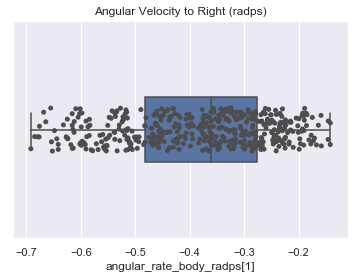

In [57]:
#  Boxplot 

ax = sns.boxplot(x="angular_rate_body_radps[1]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="angular_rate_body_radps[1]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Angular Velocity to Right (radps)")

plt.show()


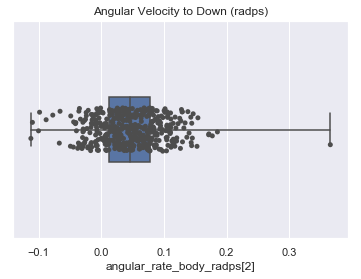

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
440                   0.0          -5.400293          12.495912           -7.29622   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
440            -27.31168            11.778591            -5.694857            0.095288   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
440            2.877154           -5.298219            0.001121            0.165722   

     orientation_rad[2]  angular_rate_body_radps[0]  angular_rate_body_radps[1]  \
440            2.761749                    0.028817                   -0.299779   

     angular_rate_body_radps[2]  position_sigma_ned_m[0]  position_sigma_ned_m[1]  \
440                    0.365751                 0.394354                 0.607622   

     position_sigma_ned_m[2]  
440                 0.737652  
440    17735
Name: flight_id, dtype: int64


In [58]:
#  Boxplot 

ax = sns.boxplot(x="angular_rate_body_radps[2]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="angular_rate_body_radps[2]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Angular Velocity to Down (radps)")

plt.show()

# Outliers 

out_ang_rate_down = launch_all_flight_data[launch_all_flight_data['angular_rate_body_radps[2]']>0.3]
print (out_ang_rate_down)

print (summary_data['flight_id'].iloc[[440],])

###  standard error of position

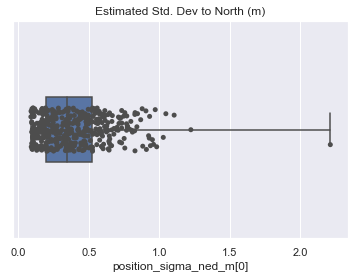

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
346                   0.0          -5.148982          11.018178          -0.376993   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
346           -27.476826             11.28461            -5.434128           -2.208311   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
346             0.96754           -5.370509           -0.010696            0.172858   

     orientation_rad[2]  angular_rate_body_radps[0]  angular_rate_body_radps[1]  \
346             2.75171                   -0.135553                   -0.220486   

     angular_rate_body_radps[2]  position_sigma_ned_m[0]  position_sigma_ned_m[1]  \
346                   -0.007732                 2.212527                 1.310819   

     position_sigma_ned_m[2]  
346                 2.397352  
346    17603
Name: flight_id, dtype: int64


In [59]:
#  Boxplot 

ax = sns.boxplot(x="position_sigma_ned_m[0]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="position_sigma_ned_m[0]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Estimated Std. Dev to North (m)")

plt.show()

# Outliers 

out_std_dev_north = launch_all_flight_data[launch_all_flight_data['position_sigma_ned_m[0]']>2]
print (out_std_dev_north)

print (summary_data['flight_id'].iloc[[346],])

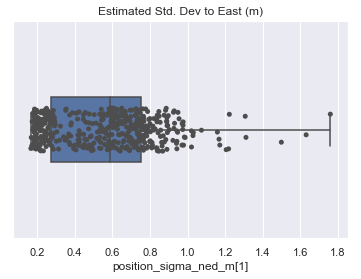

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
40                    0.0          -4.481563          11.462237          -5.914294   
199                   0.0          -5.292911          11.334870          -4.556077   
225                   0.0          -4.564810          10.072361          -7.895903   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
40            -27.411518            11.569471            -6.360321           -2.237585   
199           -27.349566            11.367506            -5.432087           -2.181651   
225           -27.464758            11.454953            -5.508598           -0.213111   

     accel_body_mps2[1]  accel_body_mps2[2]  orientation_rad[0]  orientation_rad[1]  \
40             0.305058           -7.243985           -0.001651            0.176882   
199            0.368005           -5.841092            0.007565            0.172510   
225           -0.457746          

In [60]:
#  Boxplot 

ax = sns.boxplot(x="position_sigma_ned_m[1]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="position_sigma_ned_m[1]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Estimated Std. Dev to East (m)")

plt.show()

# Outliers 

out_std_dev_east = launch_all_flight_data[launch_all_flight_data['position_sigma_ned_m[1]']>1.4]
print (out_std_dev_east)

print (summary_data['flight_id'].iloc[[40,199,225],])

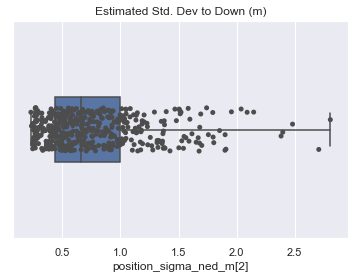

     seconds_since_launch  position_ned_m[0]  position_ned_m[1]  position_ned_m[2]  \
40                    0.0          -4.481563          11.462237          -5.914294   
55                    0.0          -5.122815           8.175831         -13.974165   
104                   0.0          -3.911195          10.896087           4.402460   
162                   0.0          -4.054032          11.513007         -22.957960   
346                   0.0          -5.148982          11.018178          -0.376993   

     velocity_ned_mps[0]  velocity_ned_mps[1]  velocity_ned_mps[2]  accel_body_mps2[0]  \
40            -27.411518            11.569471            -6.360321           -2.237585   
55            -27.759178            11.676449            -5.492649            0.760741   
104           -27.572248            11.647571            -5.684027           -3.980699   
162           -27.497446            11.346660            -5.760484           -1.241906   
346           -27.476826         

In [61]:
#  Boxplot 

ax = sns.boxplot(x="position_sigma_ned_m[2]", data=launch_all_flight_data, width=0.3, whis=np.inf)
ax = sns.stripplot(x="position_sigma_ned_m[2]",data=launch_all_flight_data, jitter=0.1, color=".3")
plt.title("Estimated Std. Dev to Down (m)")

plt.show()

# Outliers

out_std_dev_down = launch_all_flight_data[launch_all_flight_data['position_sigma_ned_m[2]']>2.2]
print (out_std_dev_down)

print (summary_data['flight_id'].iloc[[40,55,104,162,346],])

## Check Outlier Flights  in 'Summary_data' dataframe

In [62]:
# Filtering out summary_data 

outlier_flight_list = [17035,17076,17160,17176,17188,17266,17320,17361,17476,17568,17580,17585,17603,17619,17735]
motion_outlier_flight_data = summary_data[summary_data['flight_id'].isin(outlier_flight_list)]

In [63]:
print (motion_outlier_flight_data)

     flight_id  air_temperature battery_serial_number  body_serial_number      commit  \
40       17035        26.450000       15SPJJJ10023027  577348835962155029  5c504d9a16   
55       17076        24.550000       15SPJJJ10056048  577348835962150933  5c504d9a16   
104      17160        27.250000       15SPJJJ10012034  577350132790558758  5c504d9a16   
116      17176        27.850000       15SPJJJ10050016  577350132840857611  5c504d9a16   
124      17188        20.500000       15SPJJJ09036021  577350132840894487  5c504d9a16   
162      17266        32.700000       15SPJJJ10040016  577350132807368710  5c504d9a16   
194      17320        26.700000       15SPJJJ10054027  577350132840857611  5c504d9a16   
225      17361        21.950000       15SPJJJ10054027  577350132790558758  5c504d9a16   
270      17476        31.950000       15SPJJJ10048030  577348835962032159  5c504d9a16   
318      17568        23.074977       15SPJJJ10012034  577350132807348254  5c504d9a16   
326      17580       

By checking the launch airspeed and ground speed of these 15 flights none of them show very extreme low and high magnitude. 

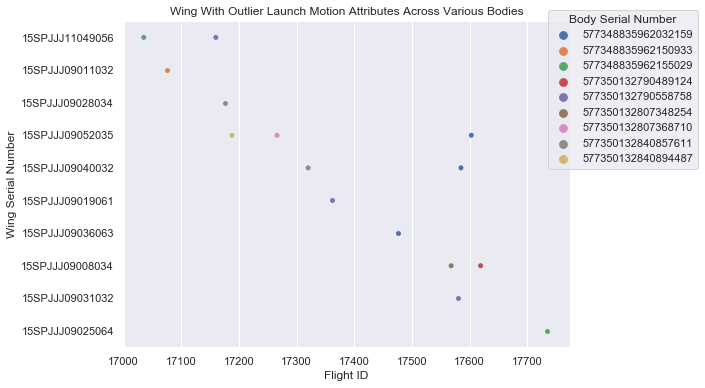

In [64]:
# Plot flight IDs across wings, and bodies 

plt.figure(figsize=(8, 6))
ax = sns.swarmplot(x="flight_id", y="wing_serial_number", hue="body_serial_number", orient="h", data=motion_outlier_flight_data)
plt.title("Wing With Outlier Launch Motion Attributes Across Various Bodies")
plt.ylabel("Wing Serial Number")
plt.xlabel("Flight ID")
plt.legend(title='Body Serial Number',loc='upper right', bbox_to_anchor=(1.3, 1.05))

plt.show()

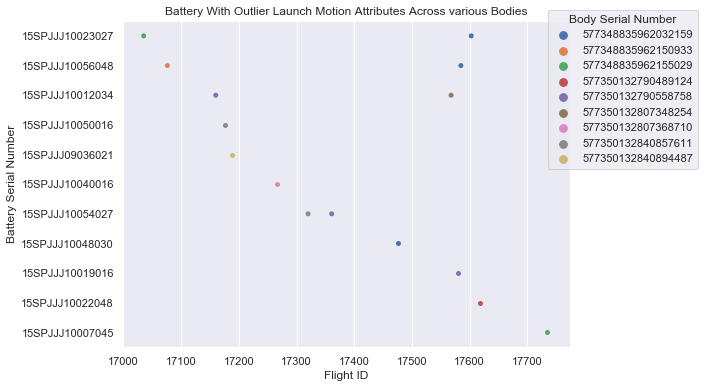

In [65]:
# Plot flight IDs across batteries, and bodies

plt.figure(figsize=(8, 6))
ax = sns.swarmplot(x="flight_id", y="battery_serial_number", hue="body_serial_number", orient="h", data=motion_outlier_flight_data)
plt.title("Battery With Outlier Launch Motion Attributes Across various Bodies")
plt.ylabel("Battery Serial Number")
plt.xlabel("Flight ID")
plt.legend(title='Body Serial Number',loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()